## Imports

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# loading the dataset
data = pd.read_csv('data/NBA.csv')

In [3]:
# checking the data for completeness of input
print("Printing head inf:\n")
data.info()
print('\n-----------------')
print("\nPrinting head info:")
data.head()

Printing head inf:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      4000 non-null   int64  
 1   poss        4000 non-null   int64  
 2   mp          4000 non-null   int64  
 3   do_ratio    4000 non-null   float64
 4   pacing      4000 non-null   float64
 5   win_rating  4000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 187.6 KB

-----------------

Printing head info:


,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [4]:
# checking the basic stats of the dataset
print("\nPrinting describe info:")
data.describe()


Printing describe info:


,season,poss,mp,do_ratio,pacing,win_rating
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2001.306750,2781.608750,1379.898500,-1.175324,0.190640,2.044921
std,12.515223,2021.057822,998.745215,3.004908,0.840869,3.473775
min,1977.000000,1.000000,0.000000,-32.624682,-5.965230,-5.428715
25%,1991.000000,960.750000,476.000000,-2.801314,-0.234717,-0.101300
50%,2002.000000,2577.000000,1269.000000,-1.153920,0.088102,0.626639
75%,2012.000000,4340.750000,2155.000000,0.533330,0.509212,3.233072
max,2021.000000,9271.000000,4270.000000,28.370510,23.732063,26.666873


## 1. Defining the feature set and target

##### Our first objective is to model the performance of the players in comparison to their peers, using the standard *Wins Above Replacement* feature, calculated as (`win_rating`) against the minutes played on court (`mp`)

In [5]:
# Modeling Wins Above Replacement ratio - calculating win_rating against the minutes played, mp

# first we select the relevant columns from the data and convert them into a dataframe
data_wins_ab_rep = data[['win_rating','mp']]

# assigning X and Y values. As mp is our independent variable, we assign it to X
X = data_wins_ab_rep[['mp']]
y = data_wins_ab_rep[['win_rating']]

##### Visualizing the relationship between the win_rating and the minutes played using scatter plot

/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_48532/4211941413.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


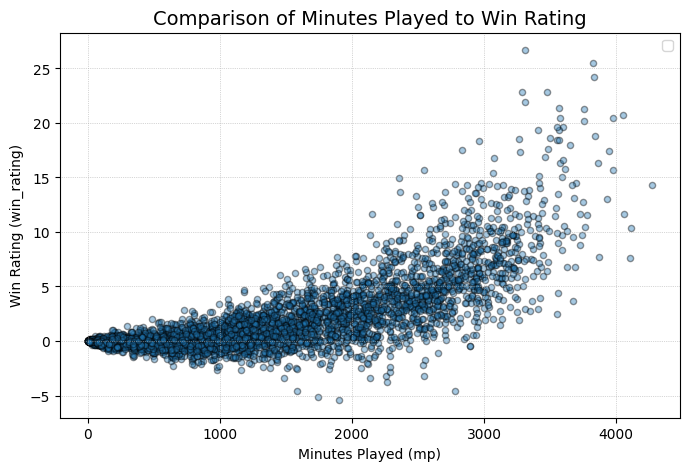

In [6]:
# Building a scatter plot to see a relationshiop between the win rating and minutes played

plt.figure(figsize=(8,5))
plt.scatter(X,y, alpha=0.4, edgecolors='k', s=20)
plt.xlabel('Minutes Played (mp)', fontsize=10)
plt.ylabel('Win Rating (win_rating)',fontsize=10)
plt.title('Comparison of Minutes Played to Win Rating',fontsize=14)
plt.grid(visible=True, linestyle="dotted", linewidth=0.5)
plt.legend()
plt.show();

## 2. Cross-Validation

##### We utilize sklearn's cross_validate function to run cross-validation fo the dataset for our Linear Regression model that predicts the player's performance rating (`win_rating`) based on the minutes played (`mp`). The output of the cross-validation is saved into (`cv_output`) variable

In [7]:
# we define our prediction model

model = LinearRegression()

# run a cross-validation with the model with 5 folds
cv_output = cross_validate(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_output['test_score']}")
print(f"Mean avg cross-validation scores: {cv_output['test_score'].mean()}")
print(f"Max cross-validation score: {cv_output['test_score'].max()}")
print(f"Min cross-validation score: {cv_output['test_score'].min()}")
print('--------------')
cv_score = cv_output['test_score'].mean()
print(f"Cross-validation score: {cv_score}")

Cross-validation scores: [0.5555057  0.53447908 0.53790391 0.57658459 0.57917762]
Mean avg cross-validation scores: 0.556730180006891
Max cross-validation score: 0.5791776193355004
Min cross-validation score: 0.53447908222725
--------------
Cross-validation score: 0.556730180006891


## 3. Train the model

##### After running cross-validation, we train the model outside of the cross-validation

In [8]:
# Run a Linear Regression model to predict the player performance rating from the minutes played

# fit the model and get the Intercept and Coefficient/Slope
model.fit(X,y)
slope = model.coef_
intercept = model.intercept_
model_score = model.score(X,y)

print(f"Model coefficient/slope: {slope}")
print(f"Model intercept: {intercept}")
print(f"Model performance score: {model_score}")

Model coefficient/slope: [[0.00260258]]
Model intercept: [-1.54637494]
Model performance score: 0.5599048286723916


##### A score R-square 0.56 means that 56% of the variance in the target variable (`win_rating`) is explained by the model's input variable (`mp`). Conversely, this also means that 44% of the variance is NOT explained by the model, which suggests room for improvements.

##### A score of 0.56 is a moderate score, indicating that the model has some predictive power, however, does not capture all the patterns in the data

Model R2: 0.5441185829799919


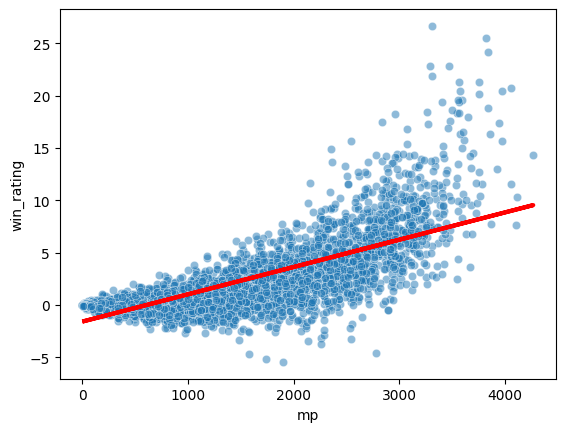

In [9]:
# Training the model
model = LinearRegression()

X = data[['mp']]
y = data['win_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)

# scoring the model
lin_reg_score = model.score(X_test, y_test)
print("Model R2:", lin_reg_score)

# extracting the coefficients and regression function
regression = model.coef_[0] * data['mp'] + model.intercept_

# plotting the data and learned regression function
sns.scatterplot(data=data, x='mp', y='win_rating', alpha=0.5)
plt.plot(data['mp'], regression, color='red', linewidth=3)

## 4. Model prediction

##### We use the trained model to predict the performance rating of a player who played 1000-4000 minutes in total with the 500-minute increment. The predicted value is saved to the variable called (`prediction`)

In [10]:
# Checking the model prediction with the data

# Define the prediction value
predict_value = pd.DataFrame({'mp':[1000,1500,2000,2500,3000,3500,4000]})

# Estimate the prediction based on the given input
prediction = model.predict(predict_value)

print(prediction)

[1.03020565 2.33295105 3.63569646 4.93844187 6.24118727 7.54393268
 8.84667808]


## 5. Improving the Model with More Features

##### Evaluating how adding other features, such as possession, (`possesion`), defense/offense ratio, (`do_ratio`), and pacing (`pacing`) impacts players' *Wins Above Replacement* rating

##### We select the variables and check their correlation with the win_rating

In [11]:
# We assign each feature to a separate variable

mp = data['mp']
poss = data['poss']
do_ratio = data['do_ratio']
pacing = data['pacing']

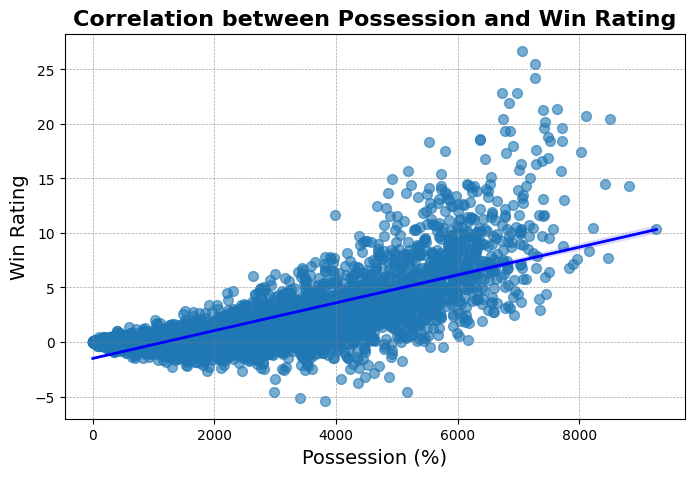

In [12]:
# Visualizing the correlaton between possession and win rating

plt.figure(figsize=(8,5))
sns.regplot(data=data, x='poss', y='win_rating', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={"color": "blue", "lw": 2})

# Adding titles and labels with enhanced styling
plt.title("Correlation between Possession and Win Rating", fontsize=16, fontweight='bold')
plt.xlabel("Possession (%)", fontsize=14)
plt.ylabel("Win Rating", fontsize=14)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show();

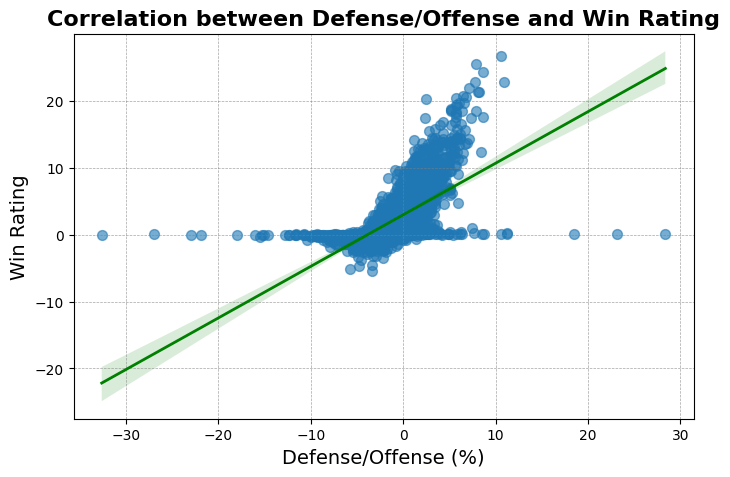

In [13]:
# Visualizing the correlaton between defense/offense ratio and win rating

plt.figure(figsize=(8,5))
sns.regplot(data=data, x='do_ratio', y='win_rating', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={"color": "green", "lw": 2})

# Adding titles and labels with enhanced styling
plt.title("Correlation between Defense/Offense and Win Rating", fontsize=16, fontweight='bold')
plt.xlabel("Defense/Offense (%)", fontsize=14)
plt.ylabel("Win Rating", fontsize=14)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show();

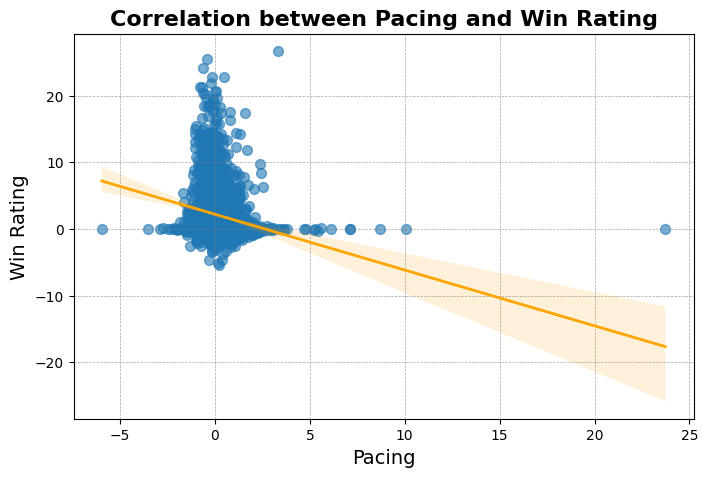

In [14]:
# Visualizing the correlaton between pacing and win rating

plt.figure(figsize=(8,5))
sns.regplot(data=data, x='pacing', y='win_rating', scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={"color": "orange", "lw": 2})

# Adding titles and labels with enhanced styling
plt.title("Correlation between Pacing and Win Rating", fontsize=16, fontweight='bold')
plt.xlabel("Pacing", fontsize=14)
plt.ylabel("Win Rating", fontsize=14)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)


##### We see from the charts that the regplot with Pacing visually exhibits significant levels of heteroskedacity, meaning that variance varies significantly across the observations. This can have a substantial impact in the prediction model if this feature is considered.

##### We will, however, consider all the features in improving our model 

In [15]:
data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [16]:
# Creating a model with 2 features
mp_do_features = pd.DataFrame(data[['mp','do_ratio']])

# Cross-validating the results with 2 features
mp_do_cv_score = cross_val_score(model,X=mp_do_features,y=y,cv=5).mean()
print(mp_do_cv_score)


0.6317728310765246


In [17]:
# Creating a model with 2 features
mp_poss_features = pd.DataFrame(data[['mp','poss']])

# Cross-validating the results with 2 features
mp_poss_cv_score = cross_val_score(model,X=mp_poss_features,y=y,cv=5).mean()
print(mp_poss_cv_score)

0.5572663297736989


In [18]:
# Creating a model with 2 features
mp_pa_features = pd.DataFrame(data[['mp','pacing']])

# Cross-validating the results with 2 features
mp_pa_cv_score = cross_val_score(model,X=mp_pa_features,y=y,cv=5).mean()
print(mp_pa_cv_score)

0.5568730687538324


##### We notice that adding Defense / Offense Ratio as a second feature does indeed improve our prediction model performance while adding Possession or Pacing doesn't change the outcome

## 6. Improving Linear Model with Polynomial Features

##### We've played around with features from our dataset, however, we still see that the model doesn't perform at the top level. One reason for that could be that the model is too simple to capture the relationship between win rating and the features of the players.

##### We can try to improve the model's performance by adding polynomial features to it, starting from the 2nd degree.

In [19]:
# We apply first polynomial feature with the second degree and fit_transform our minutes played
poly_2 = PolynomialFeatures(degree=2,include_bias=False)
X_poly = pd.DataFrame(poly_2.fit_transform(X))
X_poly = X_poly.rename(columns={
    0:'mp',
    1:'mp2'
})
X_poly.head()

,mp,mp2
0,2409.0,5803281.0
1,2708.0,7333264.0
2,2407.0,5793649.0
3,585.0,342225.0
4,2056.0,4227136.0


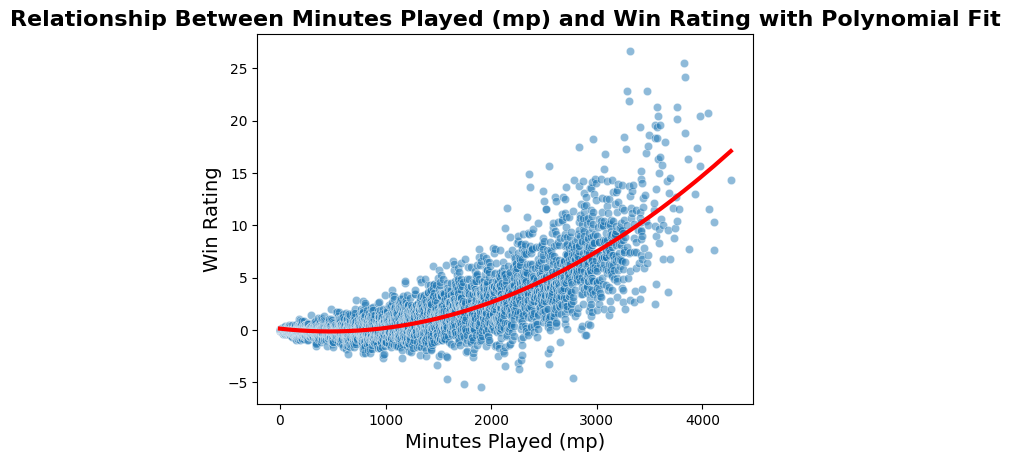

In [20]:
# We sort the data for the plotting our scatterplot

data_mp_sorted = data.sort_values('mp')

X_sorted = data_mp_sorted[['mp']]
y_sorted = data_mp_sorted[['win_rating']]

# Fitting and transforming the model with the polynomial features and running predictions
X_poly = poly_2.fit_transform(X_sorted)
model.fit(X_poly,y_sorted)
predictions = model.predict(X_poly)

# Visualizing the result from over the original data
sns.scatterplot(x=X_sorted['mp'],y=y_sorted['win_rating'],alpha=0.5)
plt.plot(X_sorted['mp'], predictions, linewidth=3, color='r')
plt.title("Relationship Between Minutes Played (mp) and Win Rating with Polynomial Fit", fontsize=16, fontweight='bold')
plt.xlabel("Minutes Played (mp)", fontsize=14)
plt.ylabel("Win Rating", fontsize=14)
plt.show();

##### Based on the visuals, it appears that the new regression line seems to be a more suitable fit for our data. Let's now run the model with adding more features to it.

##### Now we will run a basic Linear Regression model on the minutes played feature.

In [21]:
# Training the model
model = LinearRegression()

X = data[['mp']]
y = data['win_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)

# scoring the model
lin_reg_score = model.score(X_test, y_test)
print("Model R2:", lin_reg_score)

# extracting the coefficients and regression function
regression = model.coef_[0] * data['mp'] + model.intercept_

Model R2: 0.5441185829799919


##### As we see, we get a moderate result from running a Linear Regression on just one feature. Now let's try to run a Linear Regression model with all the features included in the model. 

##### We first conduct a cross-validation procedure with 5 folds and then train and run an actual model

In [22]:
# Let's first see how the model performs with the 1 degree when we take all the features into account
# We run a cross-validation and then run the actual model

mp_poss_do_pacing = pd.DataFrame({
    'mp' : mp,
    'poss' : poss,
    'do_ratio' : do_ratio,
    'pacing' : pacing
})

score_added_features = cross_validate(model,mp_poss_do_pacing,y,cv=5)['test_score'].mean()

score_added_features

np.float64(0.6321354129549308)

##### Now we run an actual Linear Regression model with all features taken into account

In [23]:
# Training the model
model = LinearRegression()

X = mp_poss_do_pacing
y = data['win_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)

# scoring the model
lin_reg_score = model.score(X_test, y_test)
print("Model R2:", lin_reg_score)

Model R2: 0.6348483104428915


##### As we see, the R-square remains in the moderate range even after adding additional features into the model. Let's now do the cros-validation with the polynomial to the 2nd degree

In [24]:
#Cross-validating the model on the polynomial features
X_full_poly = poly_2.fit_transform(mp_poss_do_pacing)
cv_full_feature_set = cross_validate(model,X=X_full_poly,y=y,cv=5)['test_score'].mean()

print(cv_full_feature_set)

0.8697420123126236


##### We see a substantial increase in the model's performance when we use a polynomial Linear Regression with multiple features. The question now becomes which degree of polynomial fits best for the model to achieve the most optimal performance.

##### For this purpose we will run a for loop to check which degree between 1 and 10 yields the best score

In [25]:
#Doing the cross-validation with polynomial degrees from 1 to 10

polynomial_scores = []

for i in range(1,11,1):
    poly_2 = PolynomialFeatures(degree=i,include_bias=False)
    X_full_poly = poly_2.fit_transform(mp_poss_do_pacing)
    cv_full_feature_set = cross_validate(model,X=X_full_poly,y=y,cv=5)['test_score'].mean()
    polynomial_scores.append(cv_full_feature_set)

best_poly_degree = polynomial_scores.index(max(polynomial_scores))+1

print(f"Polynomial to the {best_poly_degree} degree produces the best result generating R-square of\
 {round(max(polynomial_scores),2)}")

Polynomial to the 2 degree produces the best result generating R-square of 0.87


## 7. Reducing the Training Set Size

##### We've identified the optimal polynomial degree, however, we also now want to train the model on less data to save computational resources. For this purpose we make a plot on the learning curves of the best model with all features and with the degree=2 polynomial

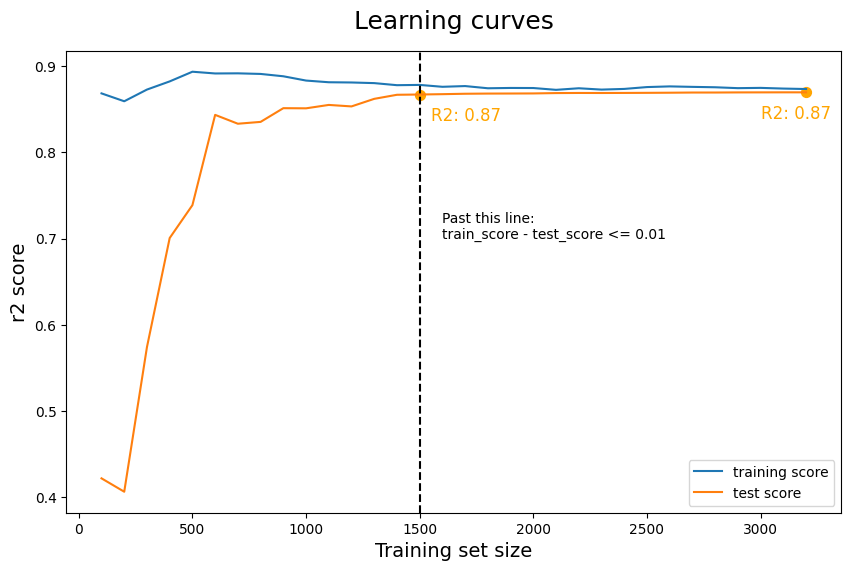

In [26]:
# create the training size slices
train_sizes = np.linspace(100, 3200, 32, dtype='int')

X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(mp_poss_do_pacing)

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator = LinearRegression(),
    X = X_poly,
    y = y,
    train_sizes = train_sizes,
    cv = 5
)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting the learning curves
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)

# Plotting a line where difference of train and test score becomes <1%
plt.axvline(1500, linestyle='--', c='black')
plt.annotate('Past this line:\ntrain_score - test_score <= 0.01', xy=(1600, 0.7))


# Comparing test scores at that line and at max training data (80% of data)
plt.scatter(train_sizes[14], test_scores_mean[14], c='orange', s=50)
plt.annotate(
    f"R2: {round(test_scores_mean[14], 2)}",
    xy=(train_sizes[14] + 50, test_scores_mean[14] - 0.03),
    fontsize=12, c='orange'
)

plt.scatter(train_sizes[31], test_scores_mean[31], c='orange', s=50)
plt.annotate(
    f"R2: {round(test_scores_mean[31],2)}",
    xy=(train_sizes[31] - 200, test_scores_mean[31] - 0.03),
    fontsize=12, c='orange'
)


plt.legend();

##### Looking at the learning curve we see that the training set of 1500 is sufficient for the model to learn and generalize the patterns of the dataset.